In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [ ]:
data = pd.read_csv('ex2data1_.txt', header=None, names=['x1', 'x2', 'y'])
data.head(10)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


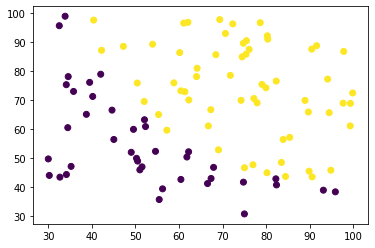

In [ ]:
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.show()

In [ ]:
matrix = data.values
x0 = np.ones((len(data), 1))

In [ ]:
matrix[:,0:2] = (matrix[:,0:2] - np.mean(matrix[:,0:2], axis=0)) / np.std(matrix[:,0:2], axis=0) 

In [ ]:
quadratic_x1 = matrix[:,0]**2
pow_4_x2 = matrix[:,1]**4
multiply_x1_x2 = matrix[:,0]*matrix[:,1]

matrix = np.column_stack((x0, matrix[:,0], matrix[:,1], quadratic_x1, pow_4_x2, multiply_x1_x2, matrix[:,2]))

In [ ]:
def H(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def F1(h, y):
    TP = ((h >= 0.5) & (y == 1)).sum()
    FP = ((h >= 0.5) & (y == 0)).sum()
    FN = ((h < 0.5) & (y == 1)).sum() 
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    return (2 * precision * recall) / (precision + recall)

In [ ]:
def gradient_descent(matrix, batch_len, alpha, theta_len, epoch, lambda_, train_split, valid_split):
    F1_train = []
    F1_valid = []
    F1_test = []
    MSEs = []
    theta = np.random.uniform(size = (1, theta_len))

    np.random.shuffle(matrix)
    train = matrix[0:int(train_split*len(matrix)), :]
    validate = matrix[int(train_split*len(matrix)):int(train_split*len(matrix))+int(valid_split*len(matrix)), :]
    test = matrix[int(train_split*len(matrix))+int(valid_split*len(matrix)):len(matrix), :]
                 
    for i in range(epoch):
        np.random.shuffle(train)
        for j in range(math.ceil(len(train)/batch_len)):
            batch_x = train[j*batch_len : j*batch_len + batch_len, : theta_len] 
            batch_y = train[j*batch_len : j*batch_len + batch_len, -1:] 
            h = H(theta @ batch_x.T)
            theta -= alpha* ((h - batch_y.T) @ batch_x +  2 * lambda_ * theta) / len(batch_x)
            j = (-batch_y.T * np.log(h) - (1-batch_y.T) * np.log(1 - h)).mean()
            MSEs.append(j)
        F1_train.append(F1(H(theta @ train[:, :theta_len].T), train[:, -1:].T))
        F1_valid.append(F1(H(theta @ validate[:, :theta_len].T), validate[:, -1:].T))
        F1_test.append(F1(H(theta @ test[:, :theta_len].T), test[:, -1:].T))
    
    return F1_train, F1_valid, F1_test, theta, MSEs

In [ ]:
#a_array = np.array([0.01, 0.007, 0.012])
#l_array = np.array([ 0.01, 0.001, 0.0008])

a_array = np.array([0.5, 0.007, 0.012])
l_array = np.array([1, 0.7, 0.003])



max_F1 = 0 
best_alpha = 0 
best_lambda = 0
best_theta_size  = 0

best_F1_valid = [] 
best_F1_test = []
best_F1_train = []
best_error = []
best_theta = []

min_F1 = 1
worst_alpha = 0
worst_lambda = 0
worst_theta_size  = 0

worst_F1_valid = []
worst_F1_test = []
worst_F1_train = []
worst_error = []
worst_theta = []

train_split = 0.6
valid_split = 0.2

for theta_size in range(3, 4):
    for a in a_array:
        for l in l_array:
            F1_train, F1_valid, F1_test, theta, error = gradient_descent(matrix, 15, a, theta_size, 3000, l, train_split, valid_split)

            for f1 in F1_valid:
                if(f1 > max_F1):
                    best_F1_train = F1_train
                    best_F1_valid = F1_valid
                    best_F1_test = F1_test
                    max_F1 = f1
                    best_lambda = l
                    best_alpha = a
                    best_theta_size = theta_size
                    best_error = error
                    best_theta = theta

                if(f1 < min_F1):
                    worst_F1_train = F1_train
                    worst_F1_valid = F1_valid
                    worst_F1_test = F1_test
                    min_F1 = f1
                    worst_lambda = l
                    worst_alpha = a
                    worst_theta_size = theta_size
                    worst_error = error
                    worst_theta = theta
    

print("The best model is: " + "\n a =" + str(best_alpha) + "\nL =" + str(best_lambda) + "\n t = " + str(best_theta))
print("The worst model is: " + "\n a =" + str(worst_alpha) + "\nL =" + str(worst_lambda) + "\n t = " + str(worst_theta))

The best model is: 
 a =0.007
L =0.003
 t = [[1.03814464 2.93498198 2.58916354]]
The worst model is: 
 a =0.012
L =0.7
 t = [[0.43618162 0.95994776 0.92938472]]


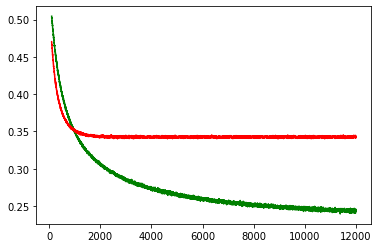

In [ ]:
window = len(data)
plt.plot(pd.DataFrame(best_error).rolling(window).mean(), 'g')
plt.plot(pd.DataFrame(worst_error).rolling(window).mean(), 'r')
plt.show()

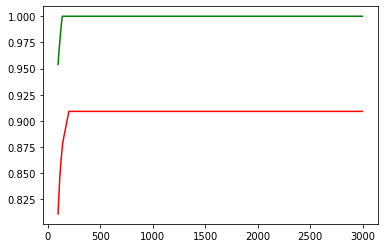

In [ ]:
plt.plot(pd.DataFrame(worst_F1_valid).rolling(window).mean(), 'r')
plt.plot(pd.DataFrame(best_F1_valid).rolling(window).mean(), 'g')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


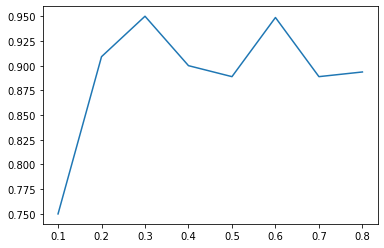

In [ ]:
train_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
f1 = []

for train in train_split:
  F1_valid, F1_test, F1_train, theta, j = gradient_descent(matrix, 15, a, theta_size, 3000, l, train, 0.2)
  f1.append(F1_valid[-1])

plt.plot(train_split, f1)
plt.show()

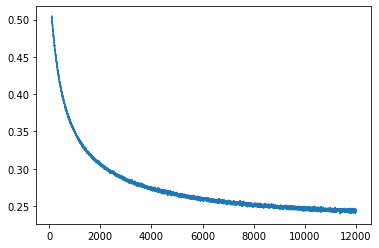

In [ ]:
plt.plot(pd.DataFrame(best_error).rolling(100).mean())
plt.show()